**Problem Statement**

We are given a dataset which consists of monthlt totals of international airline passengers, between 1949 to 1960. The objective of this analysis and modelling is to review time series theory. We will be following an **ARIMA modeling procedure** of the Air Passengers dataset as follows:

1.Perform exploratory data analysis

2.Decomposition of data.

3.Test the stationarity

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import math
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6

import warnings #for disable python warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/AirPassengers.csv')#to read the file

In [ ]:
data['Month'].head()#dataset consists of the date and monthly passengers count values

0    1949-01
1    1949-02
2    1949-03
3    1949-04
4    1949-05
Name: Month, dtype: object

In [ ]:
#Lets display the total monthly passenger count and using the lambda fxn to filter month
data['Month']=data['Month'].apply(lambda x: dt(int(x[:4]),int(x[5:]),15))
data = data.set_index('Month')#plot setting index to month
data.head()#Now lets see the data once

,#Passengers
Month,
1949-01-15,112
1949-02-15,118
1949-03-15,132
1949-04-15,129
1949-05-15,121


In [ ]:
ts = data['#Passengers']#Assigning the passengers data time series variable

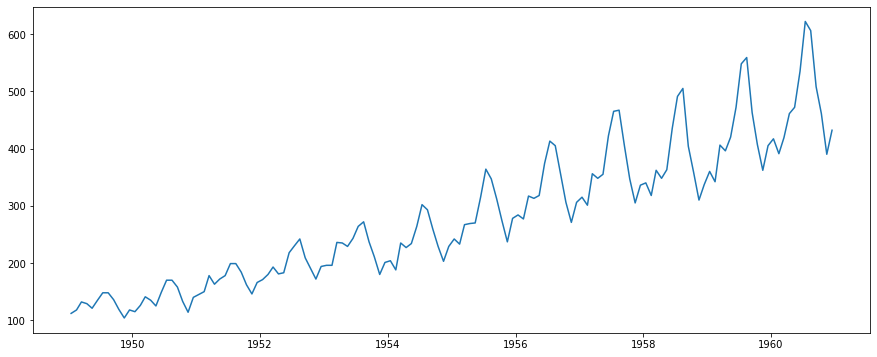

In [ ]:
plt.plot(ts)#plotting the time series we get

In [ ]:
ts_log = np.log(ts)#Transforming series using log D composition

In [ ]:
def test_stationarity(timeseries):#stationarity check and these are the functions for performing rolling statistics and Dickey-Flutter Test
    rolmean = timeseries.rolling(window=52,center=False).mean()#Calculating rolling mean
    rolstd = timeseries.rolling(window=52,center=False).std()#Calculating rolling standard deviation

#Lets plot rolling statistics
    orig = plt.plot(timeseries,color='blue',label='Original')
    mean = plt.plot(rolmean,color='red',label='Rolling Mean')
    std = plt.plot(rolstd,color='black',label = 'Rolling Std')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    print('Results of Dickey-Flutter Test:')
    #Initializing the DF test variable
    dftest = adfuller(timeseries,autolag='AIC')
    #Initializing the output with the test statistic P value and other required variable
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used',
                                            'Number of Observations Used'])
    #Initializing te critical value variable, use a for-loop to 
    for key,value in dftest[4].items():
      dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)  

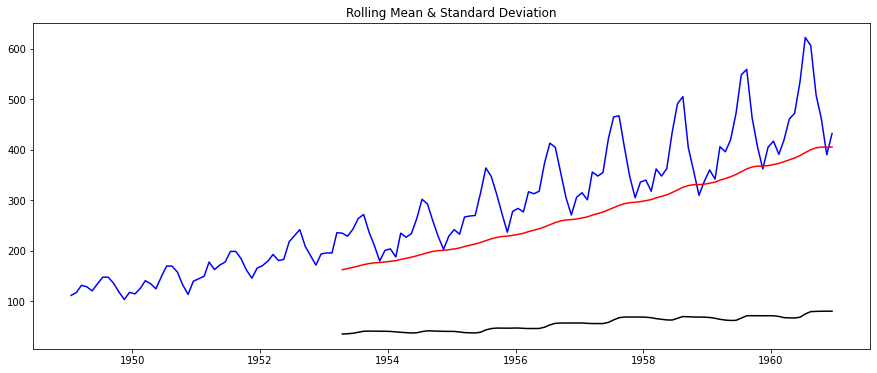

Results of Dickey-Flutter Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [ ]:
#Now lets apply the data to the fxn. and see the results for stationary
test_stationarity(data['#Passengers'])

By observing the plot and result of the Dickey Flutter test, we  inter the test statistic is more than critical value and the moving average is not constant over time. So the null hypothesis of the Dickey flutter test cannot be rejected. This shows that the time series is not stationary decomposing the data.

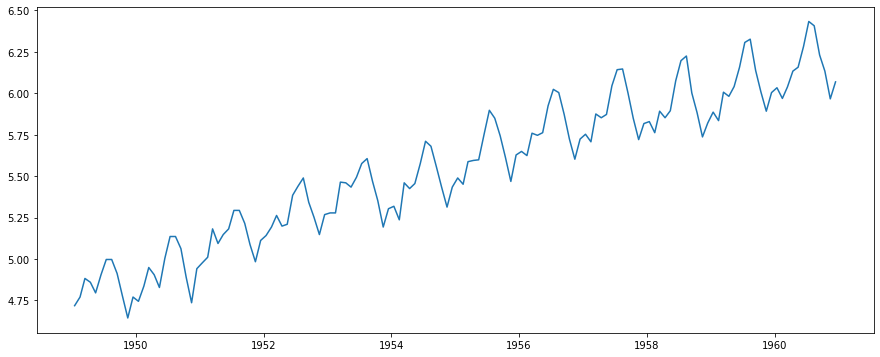

In [ ]:
plt.plot(ts_log)#Lets also plot the moving average

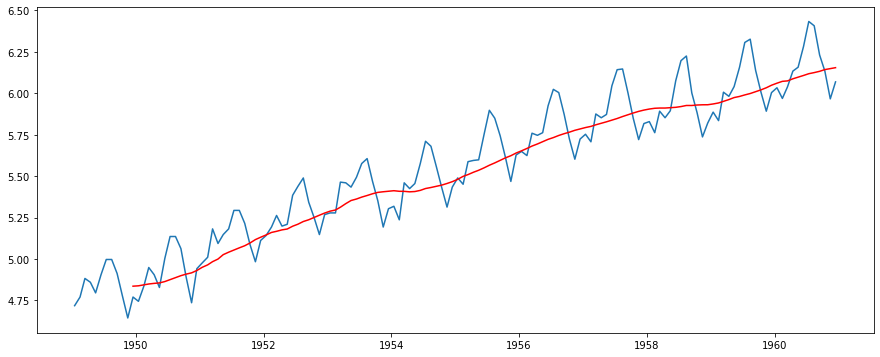

In [ ]:
movingAverage = ts_log.rolling(window=12).mean()#Initializing the moving average variable.
movingSTD = ts_log.rolling(window=12).std()#Initializing the moving standard deviation variable
plt.plot(ts_log)#Plotting the data
plt.plot(movingAverage, color='red')#Plotting the moving average

In [ ]:
ts_log_mv_diff = ts_log - movingAverage
ts_log_mv_diff.head(12)#putting the first 12 values

ts_log_mv_diff.dropna(inplace=True)#lets drop the null values from the time series data
ts_log_mv_diff.head(10)

Month
1949-12-15   -0.065494
1950-01-15   -0.093449
1950-02-15   -0.007566
1950-03-15    0.099416
1950-04-15    0.052142
1950-05-15   -0.027529
1950-06-15    0.139881
1950-07-15    0.260184
1950-08-15    0.248635
1950-09-15    0.162937
Name: #Passengers, dtype: float64

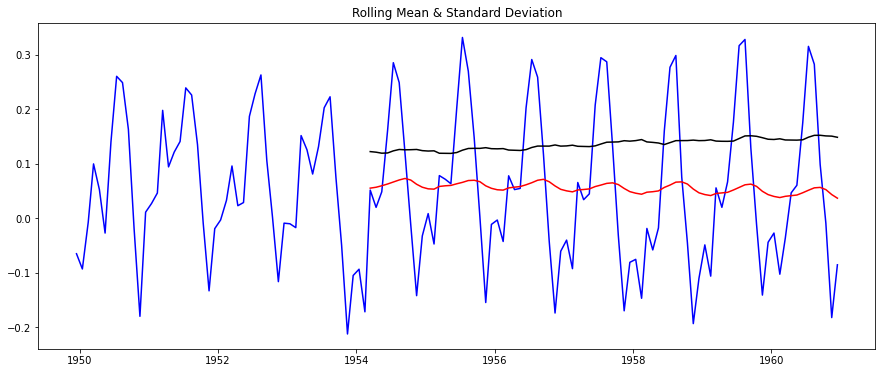

Results of Dickey-Flutter Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [ ]:
test_stationarity(ts_log_mv_diff)#here we parse our time series data into this fxn and check for stationarity

Blue line is original

Red line is Rolling Mean

Black line is Rolling STD
